### Import Model Architectures
Custom Torch Models need to be instantiated for evaluation. The model_architectures.py file contains the model architectures so we can abstract it and focus only on the evaluations.

In [1]:
from model_architectures import *
import model_architectures
from data_curator import *
from attacks import * 
import csv
# Print available classes to verify our model architectures were imported
print(dir(model_architectures))

flags = ['pgd']

Using device: cuda
Using device: cuda
['BasicBlock', 'DataLoader', 'F', 'Load', 'ResNetCIFAR', 'ResNetMNIST', 'ResnetSVHN', 'TensorDataset', 'Tester', 'Visualizer', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'cifar_directory', 'conv3x3', 'current_directory', 'device', 'mnist_directory', 'nn', 'np', 'os', 'pd', 'pickle', 'plt', 'scipy', 'svhn_directory', 'torch']


### Loading the Model Weights
Using our model artifacts we load the weights back into the model so we have our pre-trained models to test our perturbations against.

In [2]:
mnist_resnet_model = ResNetMNIST(BasicBlock, [2, 2, 2, 2], num_classes=10, grayscale=True).to(device)
cifar_resnet_model = ResNetCIFAR(BasicBlock, [2, 2, 2, 2], num_classes=10, grayscale=False).to(device)
svhn_resnet_model = ResnetSVHN(BasicBlock, [2, 2, 2, 2], num_classes=10, grayscale=False).to(device)

#add map_location=torch.device('cpu') if running locally and ur not sai lol
device = 'cuda'
# mnist_resnet_model.load_state_dict(torch.load("artifacts/resnet18_mnist_model.pth", map_location=torch.device(device)))
# cifar_resnet_model.load_state_dict(torch.load("artifacts/resnet18_cifar_model.pth", map_location=torch.device(device)))
# svhn_resnet_model.load_state_dict(torch.load("artifacts/resnet18_svhn_model.pth",map_location=torch.device(device)))
mnist_resnet_model.load_state_dict(torch.load("artifacts/resnet18_mnist_model.pth"))
cifar_resnet_model.load_state_dict(torch.load("artifacts/resnet18_cifar_model.pth"))
svhn_resnet_model.load_state_dict(torch.load("artifacts/resnet18_svhn_model.pth"))

<All keys matched successfully>

In [3]:
mnist_resnet_model.eval()
cifar_resnet_model.eval()
svhn_resnet_model.eval()

ResnetSVHN(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True

In [4]:
# Loading Data
loader = Load()
mnist_train_images, mnist_train_labels = loader.load_mnist_train_images()
cifar10_train_images, cifar10_train_labels = loader.load_cifar10_train_images()
svhn_train_images, svhn_train_labels = loader.load_svhn_train_images()

In [5]:
train_loader_mnist = loader.convert_mnist_numpy_to_tensor(mnist_train_images, mnist_train_labels)
train_loader_cifar10 = loader.convert_cifar10_numpy_to_tensor(cifar10_train_images, cifar10_train_labels)
train_loader_svhn = loader.convert_svhn_numpy_to_tensor(svhn_train_images, svhn_train_labels)
tester = Tester()

### Curating Data
We repurpose our test functions for each attack to only output adversarial examples and the total accuracy from the attack without any hanging print statements. We then run them on the entire dataset, as opposed to a sample of 256, and then store these as CSV files. 

In [6]:
curator = Curator()

In [7]:
if 'fgsm' in flags:
    fgsm_mnist_accuracy, fgsm_mnist_examples = curator.curate_fgsm(mnist_resnet_model, train_loader_mnist, 0.05)
    fgsm_cifar10_accuracy, fgsm_cifar10_examples = curator.curate_fgsm(cifar_resnet_model, train_loader_cifar10, 0.025)
    fgsm_svhn_accuracy, fgsm_svhn_examples = curator.curate_fgsm(svhn_resnet_model, train_loader_svhn, 0.025)

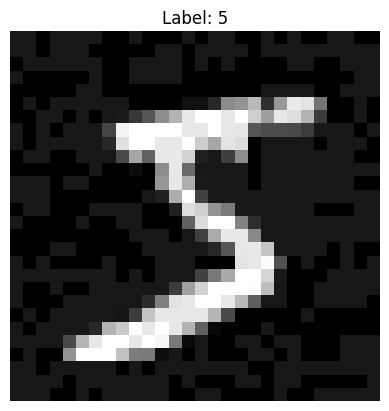

In [8]:
if 'fgsm' in flags:
    print(fgsm_mnist_accuracy)
    print(len(fgsm_mnist_examples))
    print(len(fgsm_mnist_examples[0]))
    print(fgsm_mnist_examples[0][2].shape)

    curator.store_data('augmented_data/fgsm_mnist_augmented_data.csv', fgsm_mnist_examples)
    print(fgsm_cifar10_accuracy)
    print(len(fgsm_cifar10_examples))
    print(len(fgsm_cifar10_examples[0]))
    print(fgsm_cifar10_examples[0][2].shape)

    curator.store_data('augmented_data/fgsm_cifar10_augmented_data.csv', fgsm_cifar10_examples)
    print(fgsm_svhn_accuracy)
    print(len(fgsm_svhn_examples))
    print(len(fgsm_svhn_examples[0]))
    print(fgsm_svhn_examples[0][2].shape)

    curator.store_data('augmented_data/fgsm_svhn_augmented_data.csv', fgsm_svhn_examples)

images = pd.read_csv('augmented_data/fgsm_mnist_augmented_data.csv')
def reshape_image(flat_image):
    return np.array(flat_image).reshape(28, 28)


# Assuming your DataFrame is called 'data'
labels = images.iloc[:, 0]  # Assuming the labels are in the first column
images = images.iloc[:, 1:]  # Assuming the image data starts from the second column

# Selecting the first image and its label
first_image = images.iloc[0]
first_label = int(labels.iloc[0])

# Reshape the image
reshaped_image = reshape_image(first_image)

# Display the image with its label
plt.imshow(reshaped_image, cmap='gray')
plt.title(f"Label: {first_label}")
plt.axis('off')
plt.show()